## Olympic Dataset

These days, with the Asian Olympics coming in hot, I thought that I might do an analysis on all the past Olympic Games and predict what kind of candidate had the better chance of scoring a gold medal for a particular kind of game. 

The first step in doing such analysis is to obtain data. Luckily, Kaggle has already provided one for me so a token of thanks to the kaggler that amassed the dataset in the first place!

In [3]:
df <- read.csv("dataset.csv")

In [4]:
library("ggplot2")
library("dplyr")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Analysis 

First, let's display the list of games included in the dataset in order of descending athlete count. 

In [5]:
by.sport <- group_by(df, Sport) 
sport.count <- summarize(by.sport, count=n())
sport.count <- arrange(sport.count, desc(count))
levels(sport.count$Sport)

[1] "Aeronautics"               "Alpine Skiing"            
 [3] "Alpinism"                  "Archery"                  
 [5] "Art Competitions"          "Athletics"                
 [7] "Badminton"                 "Baseball"                 
 [9] "Basketball"                "Basque Pelota"            
[11] "Beach Volleyball"          "Biathlon"                 
[13] "Bobsleigh"                 "Boxing"                   
[15] "Canoeing"                  "Cricket"                  
[17] "Croquet"                   "Cross Country Skiing"     
[19] "Curling"                   "Cycling"                  
[21] "Diving"                    "Equestrianism"            
[23] "Fencing"                   "Figure Skating"           
[25] "Football"                  "Freestyle Skiing"         
[27] "Golf"                      "Gymnastics"               
[29] "Handball"                  "Hockey"                   
[31] "Ice Hockey"                "Jeu De Paume"             
[33] "Judo"                      "Lacrosse"                 
[35] "Luge"                      "Military Ski Patrol"      
[37] "Modern Pentathlon"         "Motorboating"             
[39] "Nordic Combined"           "Polo"                     
[41] "Racquets"                  "Rhythmic Gymnastics"      
[43] "Roque"                     "Rowing"                   
[45] "Rugby"                     "Rugby Sevens"             
[47] "Sailing"                   "Shooting"                 
[49] "Short Track Speed Skating" "Skeleton"                 
[51] "Ski Jumping"               "Snowboarding"             
[53] "Softball"                  "Speed Skating"            
[55] "Swimming"                  "Synchronized Swimming"    
[57] "Table Tennis"              "Taekwondo"                
[59] "Tennis"                    "Trampolining"             
[61] "Triathlon"                 "Tug-Of-War"               
[63] "Volleyball"                "Water Polo"               
[65] "Weightlifting"             "Wrestling"

Now since the list is too long, I only pick the games that are interesting to me to analyze, which are: shooting, table tennis, swimming, Badminton, Gymnastics.

### Shooting

In [7]:
shooting.events <- filter(df, Sport == 'Shooting')
events <- group_by(shooting.events, Event)
events <- summarise(events, count=n())
events <- arrange(events, desc(count))
events$Event

[1] Shooting Men's Small-Bore Rifle, Prone, 50 metres                                    
 [2] Shooting Men's Free Pistol, 50 metres                                                
 [3] Shooting Men's Rapid-Fire Pistol, 25 metres                                          
 [4] Shooting Men's Small-Bore Rifle, Three Positions, 50 metres                          
 [5] Shooting Men's Trap                                                                  
 [6] Shooting Men's Air Rifle, 10 metres                                                  
 [7] Shooting Women's Air Rifle, 10 metres                                                
 [8] Shooting Mixed Skeet                                                                 
 [9] Shooting Men's Free Rifle, Three Positions, 300 metres                               
[10] Shooting Men's Air Pistol, 10 metres                                                 
[11] Shooting Mixed Trap                                                                  
[12] Shooting Women's Air Pistol, 10 metres                                               
[13] Shooting Women's Sporting Pistol, 25 metres                                          
[14] Shooting Women's Small-Bore Rifle, Three Positions, 50 metres                        
[15] Shooting Mixed Small-Bore Rifle, Prone, 50 metres                                    
[16] Shooting Men's Skeet                                                                 
[17] Shooting Mixed Small-Bore Rifle, Three Positions, 50 metres                          
[18] Shooting Men's Free Rifle, Three Positions, 300 metres, Team                         
[19] Shooting Mixed Free Pistol, 50 metres                                                
[20] Shooting Mixed Rapid-Fire Pistol, 25 metres                                          
[21] Shooting Men's Trap, Team                                                            
[22] Shooting Men's Double Trap                                                           
[23] Shooting Men's Free Pistol, 50 metres, Team                                          
[24] Shooting Women's Trap                                                                
[25] Shooting Men's Running Target, Single Shot                                           
[26] Shooting Men's Military Rifle, Three Positions, 300 metres                           
[27] Shooting Men's Free Rifle, 400, 600 and 800 metres, Team                             
[28] Shooting Men's Military Rifle, Any Position, 600 metres                              
[29] Shooting Women's Skeet                                                               
[30] Shooting Men's Running Target, 10 metres                                             
[31] Shooting Men's Military Rifle, Prone, 300 metres, Team                               
[32] Shooting Men's Military Rifle, Standing, 300 metres, Team                            
[33] Shooting Men's Running Target, Double Shot                                           
[34] Shooting Mixed Running Target, 50 metres                                             
[35] Shooting Men's Free Rifle, Prone, 600 metres                                         
[36] Shooting Men's Running Target, Single Shot, Team                                     
[37] Shooting Men's Military Rifle, 300 metres and 600 metres, Prone, Team                
[38] Shooting Men's Military Rifle, Prone, 600 metres, Team                               
[39] Shooting Mixed Free Rifle, Three Positions, 300 metres                               
[40] Shooting Men's Military Rifle, 200, 400, 500 and 600 metres, Team                    
[41] Shooting Women's Double Trap                                                         
[42] Shooting Men's Free Rifle, 1,000 Yards                                               
[43] Shooting Men's Small Bore-Rifle, Standing, 50 metres, Team                           
[44] Shooting Men's Small-Bore Rifle, Standing, 50 metres                               

Seeing as the list is too long, I only take on several representative to analyze. 

In [8]:
event <- filter(df, Event == "Shooting Men's Free Pistol, 50 metres")
event <- select(event, ID, Name, Age, Height, Weight, Team, Medal)
event <- group_by(event, Medal)
event <- summarize(event, average_age=mean(Age, na.rm = TRUE), average_height=mean(Height, na.rm = TRUE), average_weight=mean(Weight, na.rm = TRUE))
event

Medal,average_age,average_height,average_weight
Bronze,32.05556,173.6667,77.07143
Gold,30.22222,176.9333,80.50000
Silver,34.38889,174.1333,81.38462
NA,36.06039,175.0542,78.13389


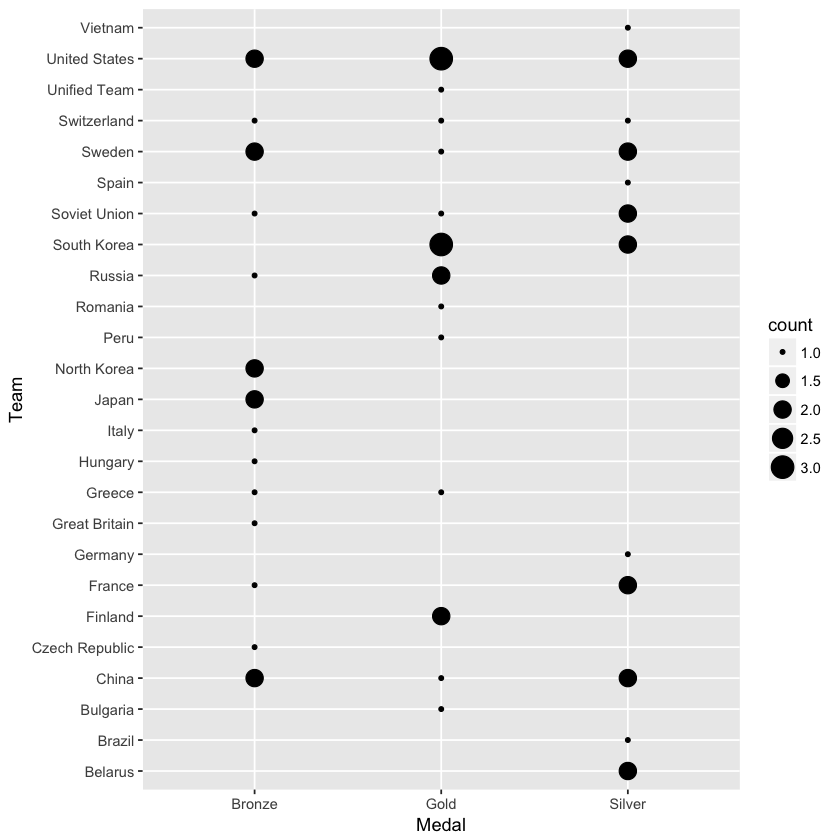

In [9]:
event <- filter(df, Event == "Shooting Men's Free Pistol, 50 metres")
event <- filter(event, Medal != "NA")
event <- select(event, ID, Name, Age, Height, Weight, Team, Medal)
event <- group_by(event, Team, Medal)
event <- summarize(event, count=n())
ggplot(event, aes(x=Team, y=Medal)) +
  geom_point(aes(size=count)) +
  coord_flip()

As the data shows, in terms of body stature, the data is pretty random as there is no significant evidence in favor of a specific combination. I'd say the typical medal-scorer is around 30 to 35 years old, of height about 175, and of weight around 80kg. Additionally, the best countries in this event are United States, South Korea, Finland, China, France, Sweden. 

#### Shooting Men's Air Rifle, 10 metres

In [11]:
event <- filter(df, Event == "Shooting Men's Air Rifle, 10 metres")
event <- select(event, ID, Name, Age, Height, Weight, Team, Medal)
event <- group_by(event, Medal)
event <- summarize(event, average_age=mean(Age, na.rm = TRUE), average_height=mean(Height, na.rm = TRUE), average_weight=mean(Weight, na.rm = TRUE))
event

Medal,average_age,average_height,average_weight
Bronze,31.77778,175.6667,77.33333
Gold,25.22222,175.1111,69.88889
Silver,25.66667,177.1111,71.11111
NA,28.95500,176.8363,75.30720


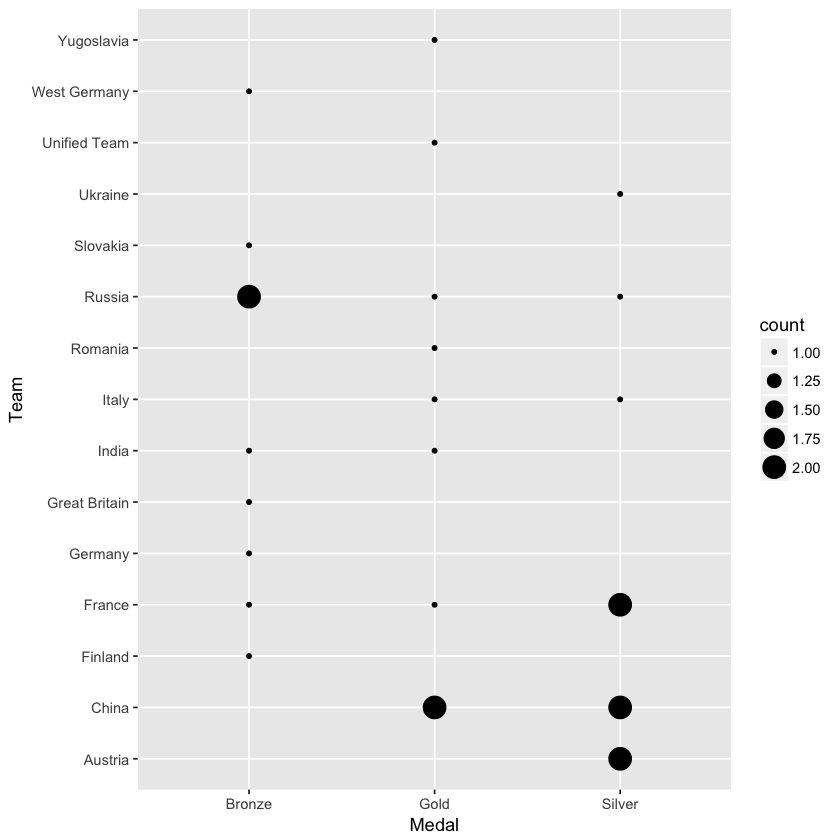

In [12]:
event <- filter(df, Event == "Shooting Men's Air Rifle, 10 metres")
event <- filter(event, Medal != "NA")
event <- select(event, ID, Name, Age, Height, Weight, Team, Medal)
event <- group_by(event, Team, Medal)
event <- summarize(event, count=n())
ggplot(event, aes(x=Team, y=Medal)) +
  geom_point(aes(size=count)) +
  coord_flip()

So the conclusion is that the best athletes in this game are from China, France, and Russia and of of age 25, of height 175, of weight 70.

### Table Tennis

In [15]:
shooting.events <- filter(df, Sport == 'Table Tennis')
events <- group_by(shooting.events, Event)
events <- summarise(events, count=n())
events <- arrange(events, desc(count))
events

Event,count
Table Tennis Men's Singles,536
Table Tennis Women's Singles,518
Table Tennis Men's Doubles,322
Table Tennis Women's Doubles,290
Table Tennis Women's Team,145
Table Tennis Men's Team,144


Since it's impossible for me to investigate all of them, I'll just dig into the singles games since they are in most of the times an indicator of success of Doubles and Team games.

#### Table Tennis Men's Singles

In [16]:
event <- filter(df, Event == "Table Tennis Men's Singles")
event <- select(event, ID, Name, Age, Height, Weight, Team, Medal)
event <- group_by(event, Medal)
event <- summarize(event, average_age=mean(Age, na.rm = TRUE), average_height=mean(Height, na.rm = TRUE), average_weight=mean(Weight, na.rm = TRUE))
event

Medal,average_age,average_height,average_weight
Bronze,25.22222,179.2222,70.0000
Gold,23.87500,174.3750,68.5000
Silver,26.25000,174.3750,73.3750
NA,27.58235,177.2664,71.8351


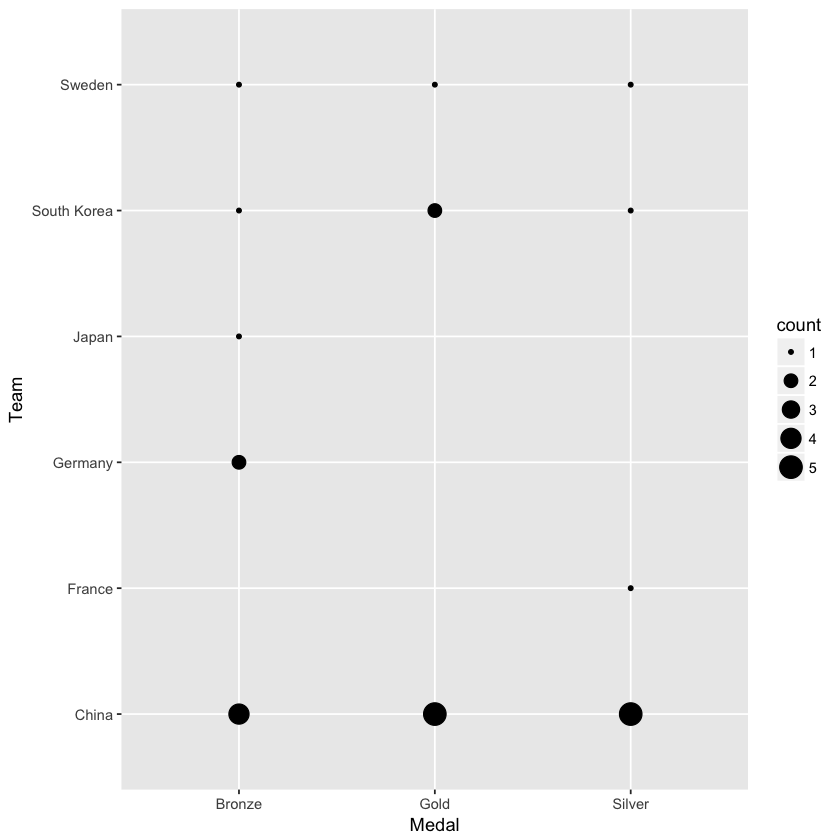

In [17]:
event <- filter(df, Event == "Table Tennis Men's Singles")
event <- filter(event, Medal != "NA")
event <- select(event, ID, Name, Age, Height, Weight, Team, Medal)
event <- group_by(event, Team, Medal)
event <- summarize(event, count=n())
ggplot(event, aes(x=Team, y=Medal)) +
  geom_point(aes(size=count)) +
  coord_flip()

Aha, the obvious winners here are China, and South Korea. And the typical stature for a gold medaller is: age below 25, height around 175, weight below 70.

#### Table Tennis Women's Singles

In [19]:
event <- filter(df, Event == "Table Tennis Men's Singles")
event <- select(event, ID, Name, Age, Height, Weight, Team, Medal)
event <- group_by(event, Medal)
event <- summarize(event, average_age=mean(Age, na.rm = TRUE), average_height=mean(Height, na.rm = TRUE), average_weight=mean(Weight, na.rm = TRUE))
event

Medal,average_age,average_height,average_weight
Bronze,25.22222,179.2222,70.0000
Gold,23.87500,174.3750,68.5000
Silver,26.25000,174.3750,73.3750
NA,27.58235,177.2664,71.8351


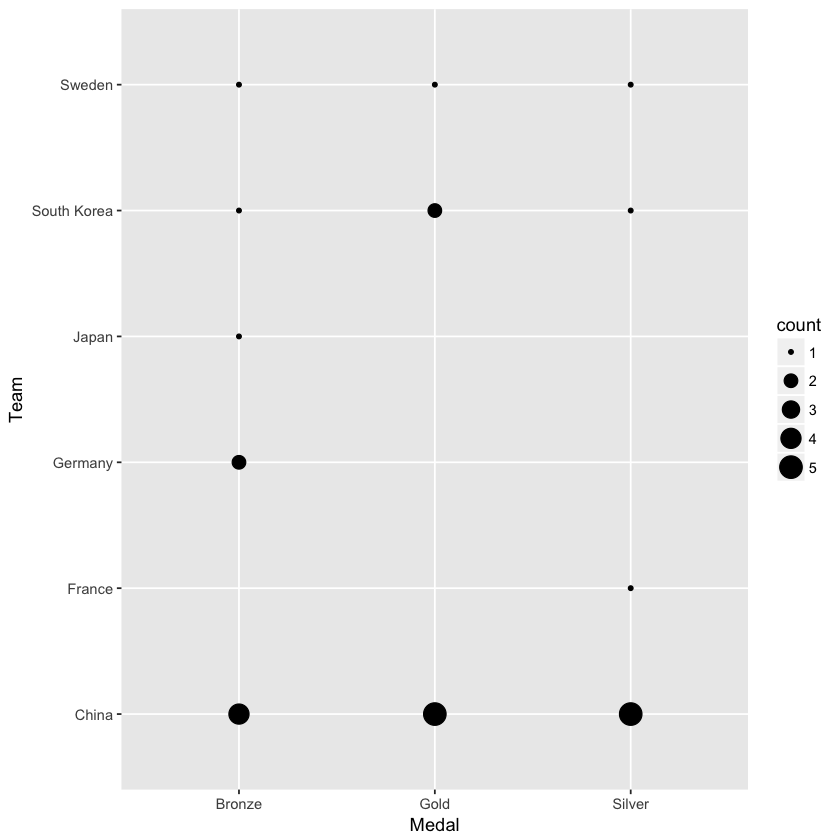

In [20]:
event <- filter(df, Event == "Table Tennis Men's Singles")
event <- filter(event, Medal != "NA")
event <- select(event, ID, Name, Age, Height, Weight, Team, Medal)
event <- group_by(event, Team, Medal)
event <- summarize(event, count=n())
ggplot(event, aes(x=Team, y=Medal)) +
  geom_point(aes(size=count)) +
  coord_flip()

The best performers of this game are men from China, South Korea, and Sweden and of height 175, age 23, weight 70.

### Swimming

In [23]:
shooting.events <- filter(df, Sport == 'Swimming')
events <- group_by(shooting.events, Event)
events <- summarise(events, count=n())
events <- arrange(events, desc(count))
events

Event,count
Swimming Men's 4 x 200 metres Freestyle Relay,1543
Swimming Men's 100 metres Freestyle,1295
Swimming Men's 4 x 100 metres Medley Relay,1242
Swimming Women's 4 x 100 metres Freestyle Relay,1225
Swimming Women's 4 x 100 metres Medley Relay,1060
Swimming Women's 100 metres Freestyle,947
Swimming Men's 4 x 100 metres Freestyle Relay,937
Swimming Men's 400 metres Freestyle,928
Swimming Men's 200 metres Breaststroke,868
Swimming Men's 100 metres Backstroke,850


Since the list is unreasonably long, I'll pick several representatives to investigate.

#### Swimming Men's 4 x 100 metres Medley Relay

In [24]:
event <- filter(df, Event == "Swimming Men's 4 x 100 metres Medley Relay")
event <- select(event, ID, Name, Age, Height, Weight, Team, Medal)
event <- group_by(event, Medal)
event <- summarize(event, average_age=mean(Age, na.rm = TRUE), average_height=mean(Height, na.rm = TRUE), average_weight=mean(Weight, na.rm = TRUE))
event

Medal,average_age,average_height,average_weight
Bronze,21.55422,184.4487,78.79487
Gold,22.51327,187.9558,83.30973
Silver,22.07229,187.0769,80.85714
NA,21.36573,184.4782,78.51073


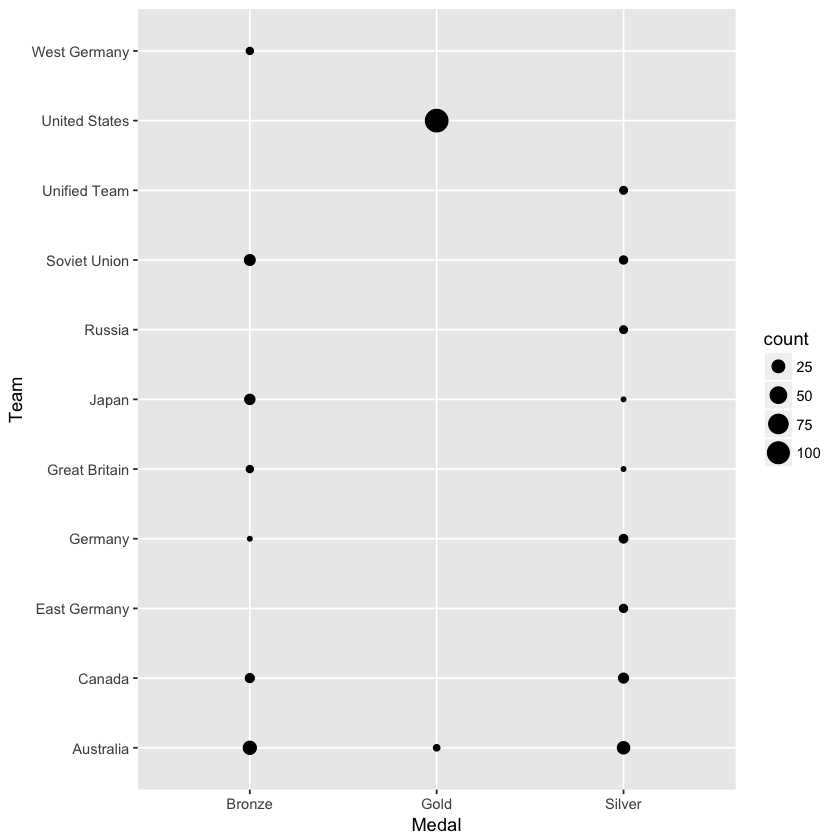

In [25]:
event <- filter(df, Event == "Swimming Men's 4 x 100 metres Medley Relay")
event <- filter(event, Medal != "NA")
event <- select(event, ID, Name, Age, Height, Weight, Team, Medal)
event <- group_by(event, Team, Medal)
event <- summarize(event, count=n())
ggplot(event, aes(x=Team, y=Medal)) +
  geom_point(aes(size=count)) +
  coord_flip()

Now as the data demonstrates, the top swimmers are mostly from Australia and the U.S. And the data shows a clear trend towards men of age around 22, of height 188, and of weight around 83.

#### Swimming Women's 4 x 100 metres Medley Relay

In [26]:
event <- filter(df, Event == "Swimming Women's 4 x 100 metres Medley Relay")
event <- select(event, ID, Name, Age, Height, Weight, Team, Medal)
event <- group_by(event, Medal)
event <- summarize(event, average_age=mean(Age, na.rm = TRUE), average_height=mean(Height, na.rm = TRUE), average_weight=mean(Weight, na.rm = TRUE))
event

Medal,average_age,average_height,average_weight
Bronze,19.04225,172.4706,62.60294
Gold,19.41441,173.7297,63.71171
Silver,20.37778,174.4607,64.10000
NA,19.60025,171.4278,61.36528


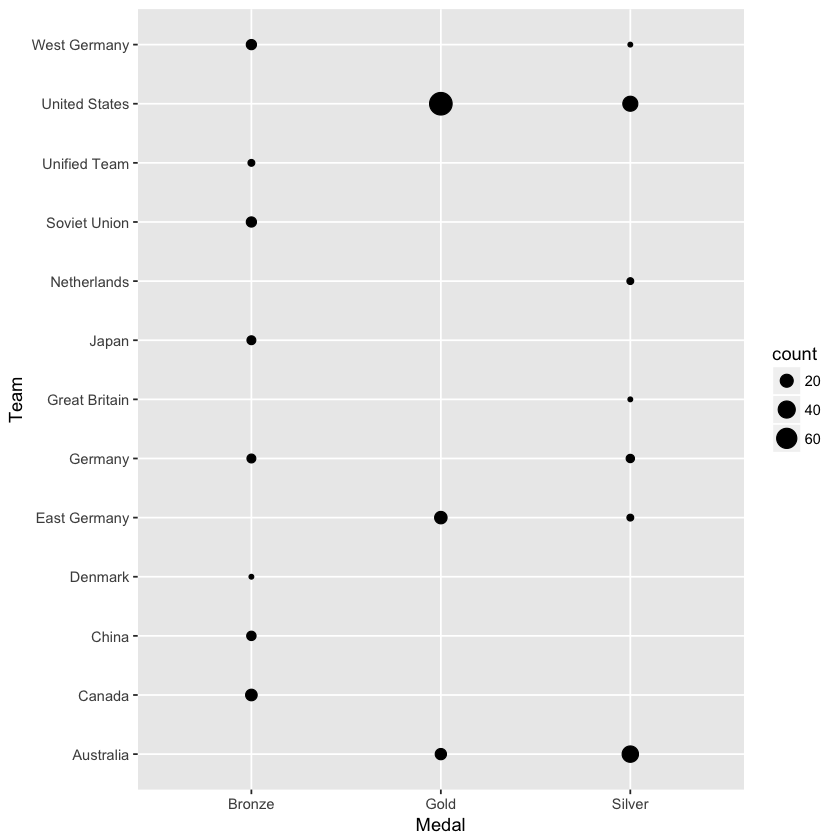

In [27]:
event <- filter(df, Event == "Swimming Women's 4 x 100 metres Medley Relay")
event <- filter(event, Medal != "NA")
event <- select(event, ID, Name, Age, Height, Weight, Team, Medal)
event <- group_by(event, Team, Medal)
event <- summarize(event, count=n())
ggplot(event, aes(x=Team, y=Medal)) +
  geom_point(aes(size=count)) +
  coord_flip()

This game fares the best for women of age around 20, of height around 175, of weight around 63 and from Australia, Germany, and the United States.

### Badminton

In [28]:
shooting.events <- filter(df, Sport == 'Badminton')
events <- group_by(shooting.events, Event)
events <- summarise(events, count=n())
events <- arrange(events, desc(count))
events

Event,count
Badminton Women's Doubles,306
Badminton Women's Singles,304
Badminton Men's Doubles,294
Badminton Men's Singles,293
Badminton Mixed Doubles,260


Same as previously, this time I'll also investigate the singles games. 

#### Badminton Women's Singles

In [29]:
event <- filter(df, Event == "Badminton Women's Singles")
event <- select(event, ID, Name, Age, Height, Weight, Team, Medal)
event <- group_by(event, Medal)
event <- summarize(event, average_age=mean(Age, na.rm = TRUE), average_height=mean(Height, na.rm = TRUE), average_weight=mean(Weight, na.rm = TRUE))
event

Medal,average_age,average_height,average_weight
Bronze,23.37500,168.0000,60.71429
Gold,24.71429,170.1667,62.40000
Silver,22.42857,172.5000,63.83333
NA,24.48582,168.0469,60.80556


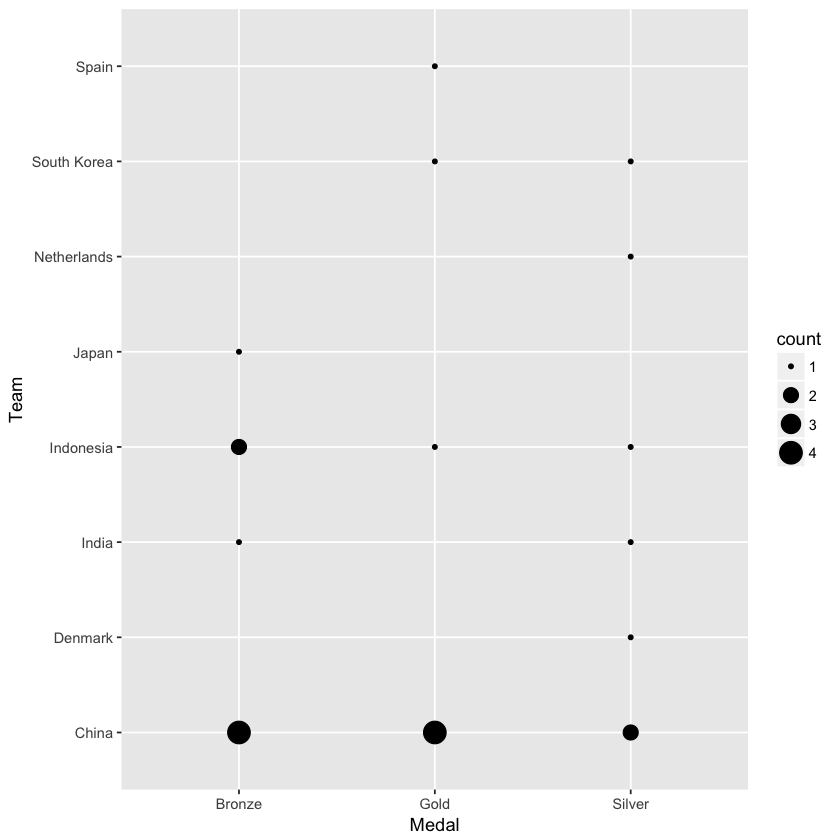

In [30]:
event <- filter(df, Event == "Badminton Women's Singles")
event <- filter(event, Medal != "NA")
event <- select(event, ID, Name, Age, Height, Weight, Team, Medal)
event <- group_by(event, Team, Medal)
event <- summarize(event, count=n())
ggplot(event, aes(x=Team, y=Medal)) +
  geom_point(aes(size=count)) +
  coord_flip()

The top female players are from China and Indonesia and of age 25, height 170, weight 62.

#### Badminton Men's Singles

In [32]:
event <- filter(df, Event == "Badminton Men's Singles")
event <- select(event, ID, Name, Age, Height, Weight, Team, Medal)
event <- group_by(event, Medal)
event <- summarize(event, average_age=mean(Age, na.rm = TRUE), average_height=mean(Height, na.rm = TRUE), average_weight=mean(Weight, na.rm = TRUE))
event

Medal,average_age,average_height,average_weight
Bronze,23.37500,180.5000,73.12500
Gold,25.42857,180.5714,72.28571
Silver,26.14286,173.1429,69.42857
NA,25.57196,179.3048,73.04373


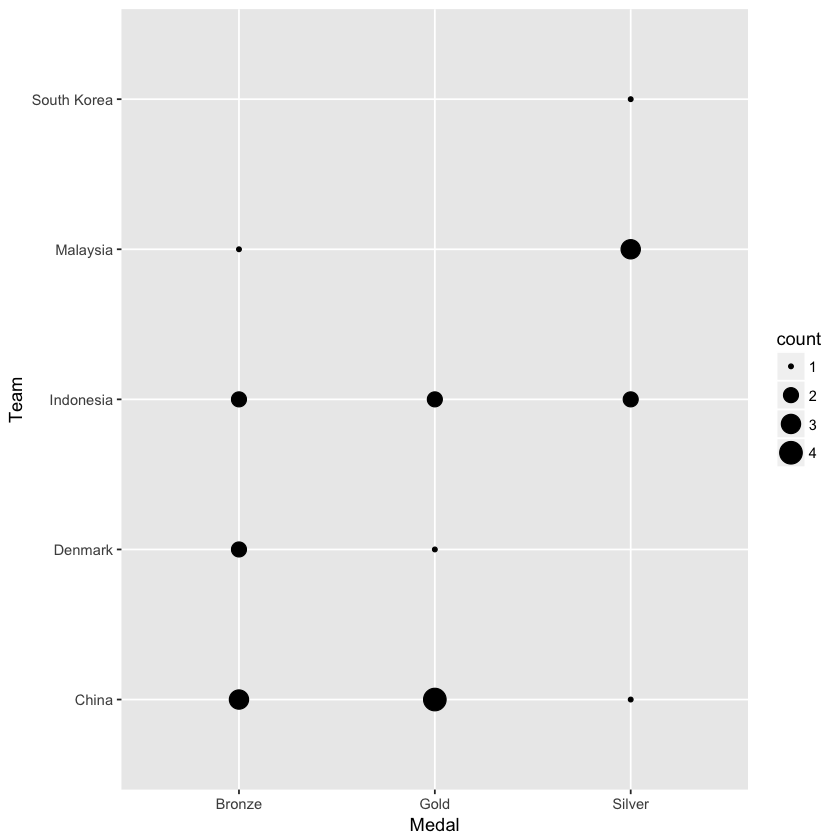

In [33]:
event <- filter(df, Event == "Badminton Men's Singles")
event <- filter(event, Medal != "NA")
event <- select(event, ID, Name, Age, Height, Weight, Team, Medal)
event <- group_by(event, Team, Medal)
event <- summarize(event, count=n())
ggplot(event, aes(x=Team, y=Medal)) +
  geom_point(aes(size=count)) +
  coord_flip()

Now it seems that the best players are from China, Indonesia, Denmark, and Malaysia. The typical medal scorers are of age around 25, height around 175, weight around 70.

### Gymnastics

In [34]:
shooting.events <- filter(df, Sport == 'Gymnastics')
events <- group_by(shooting.events, Event)
events <- summarise(events, count=n())
events <- arrange(events, desc(count))
events

Event,count
Gymnastics Men's Individual All-Around,2500
Gymnastics Men's Team All-Around,2411
Gymnastics Men's Parallel Bars,2049
Gymnastics Men's Horizontal Bar,2041
Gymnastics Men's Pommelled Horse,2031
Gymnastics Men's Rings,2020
Gymnastics Men's Floor Exercise,1880
Gymnastics Men's Horse Vault,1868
Gymnastics Women's Individual All-Around,1539
Gymnastics Women's Balance Beam,1531


Apparently, I'll only pick representatives to investigate

#### Gymnastics Men's Individual All-Around

In [35]:
event <- filter(df, Event == "Gymnastics Men's Individual All-Around")
event <- select(event, ID, Name, Age, Height, Weight, Team, Medal)
event <- group_by(event, Medal)
event <- summarize(event, average_age=mean(Age, na.rm = TRUE), average_height=mean(Height, na.rm = TRUE), average_weight=mean(Weight, na.rm = TRUE))
event

Medal,average_age,average_height,average_weight
Bronze,24.30769,168.1111,63.17647
Gold,26.10714,166.0500,61.13333
Silver,25.13793,163.9000,59.42105
NA,24.59991,167.7047,63.42972


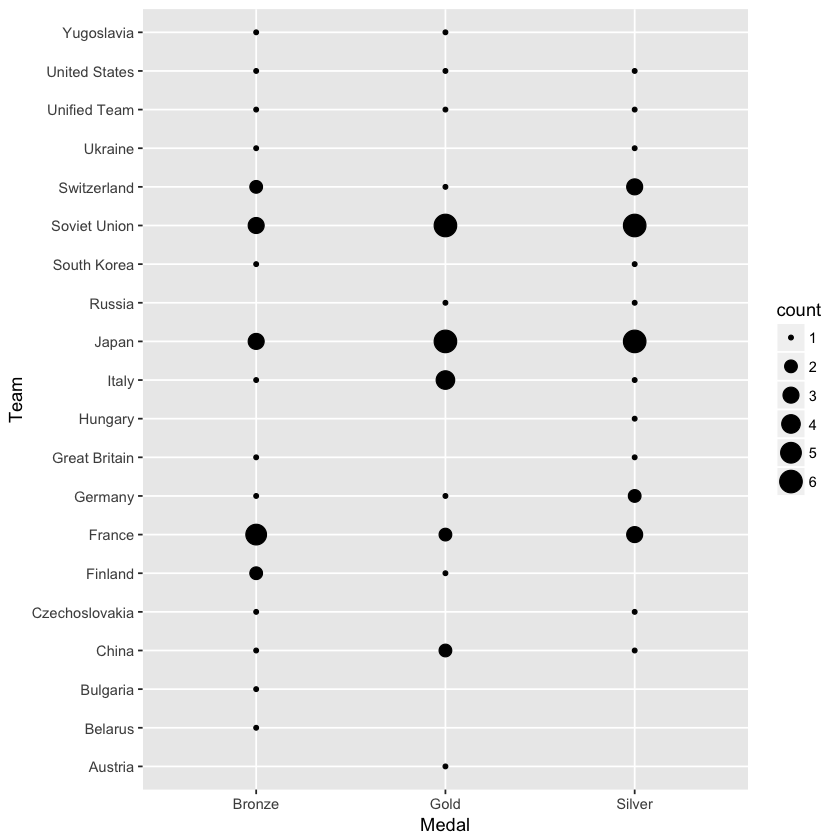

In [36]:
event <- filter(df, Event == "Gymnastics Men's Individual All-Around")
event <- filter(event, Medal != "NA")
event <- select(event, ID, Name, Age, Height, Weight, Team, Medal)
event <- group_by(event, Team, Medal)
event <- summarize(event, count=n())
ggplot(event, aes(x=Team, y=Medal)) +
  geom_point(aes(size=count)) +
  coord_flip()

The top players are from China, France, Japan, Italy, USSR (a.k.a Russia nowadays). The typical medal scorer is of age around 25, height 165, weight 60.

#### Gymnastics Women's Individual All-Around

In [38]:
event <- filter(df, Event == "Gymnastics Women's Individual All-Around")
event <- select(event, ID, Name, Age, Height, Weight, Team, Medal)
event <- group_by(event, Medal)
event <- summarize(event, average_age=mean(Age, na.rm = TRUE), average_height=mean(Height, na.rm = TRUE), average_weight=mean(Weight, na.rm = TRUE))
event

Medal,average_age,average_height,average_weight
Bronze,19.29412,158.0000,47.57143
Gold,19.47059,154.8667,47.80000
Silver,20.83333,154.3750,45.25000
NA,19.01826,156.0517,47.71262


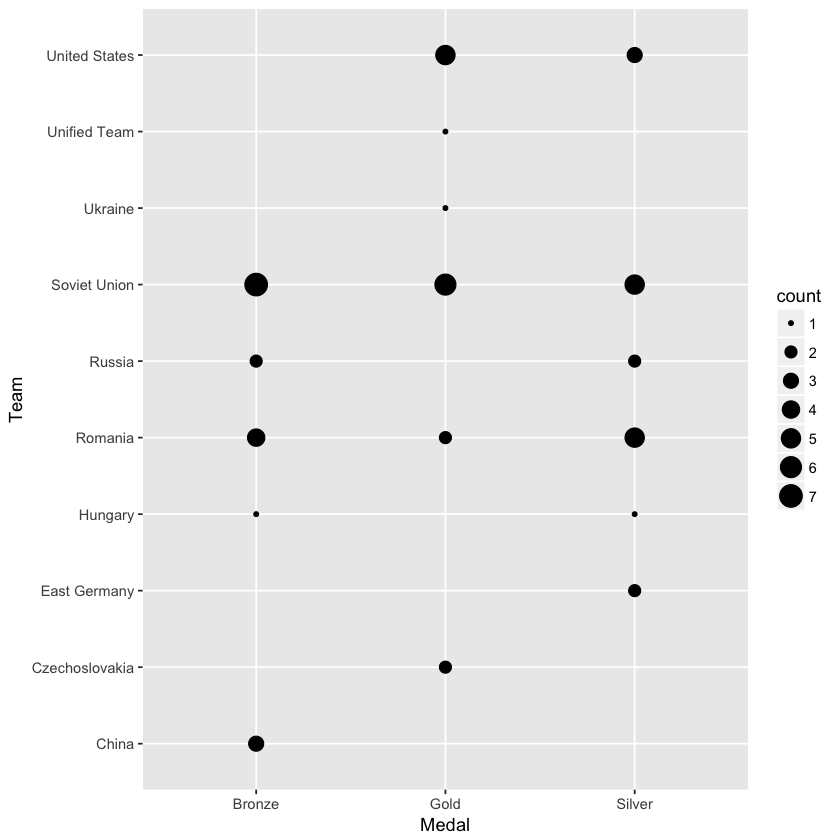

In [39]:
event <- filter(df, Event == "Gymnastics Women's Individual All-Around")
event <- filter(event, Medal != "NA")
event <- select(event, ID, Name, Age, Height, Weight, Team, Medal)
event <- group_by(event, Team, Medal)
event <- summarize(event, count=n())
ggplot(event, aes(x=Team, y=Medal)) +
  geom_point(aes(size=count)) +
  coord_flip()

The top players are from Czechoslovakia, Romania, Soviet Union, and the United States. The typical medal scores are of age 20, height 155, weight 47.